<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/96/Pytorch_logo.png/800px-Pytorch_logo.png" alt="alt text" width="400" height="100">


<h2> Pytorch Autograd </h2>

Now on to something that makes Pytorch (and other Deep Learning frameworks) unique, the auto-differentiable computational graphs.

Remember how compute the gradients of parameters (weights) of a model by "backpropagation". Firstly, calculating the "gradient" of the loss with respect to the model's output and then using the chain rule find the gradient of the loss with respect to the parameters or the input and on and on for larger networks.

In [ ]:
import torch
import torchvision
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Define some values
x1 = torch.FloatTensor([4])
w1 = torch.FloatTensor([2])
b1 = torch.FloatTensor([3])

# Create a simple linear equation
y = w1 * x1 + b1    # y = 2 * x + 3

# Calculate the partial derivatives for this equation
dy_dx = w1
dy_dw = x1
dy_db = 1

print("Calculated Gradients:")
print("dy/dx =", dy_dx.item())
print("dy/dw =", dy_dw.item())
print("dy/db =", dy_db)

Calculated Gradients:
dy/dx = 2.0
dy/dw = 4.0
dy/db = 1


In [ ]:
# Create some tensors, requires_grad tells Pytorch the gradients for this tensor are required to store
x = torch.FloatTensor([4])
x.requires_grad = True
w = torch.FloatTensor([2])
w.requires_grad = True
b = torch.FloatTensor([3])
b.requires_grad = True

# By performing a simple computation Pytorch will build a computational graph.
y = w * x + b    # y = 2 * x + 3

# Compute gradients via Pytorch's Autograd
y.backward()

# Print out the calculated gradients
# These gradients are the gradients with respect to the point where backprop from y
print("Calculated Gradients:")
print("dy/dx =", x.grad.item())    # x.grad = dy/dx = 2
print("dy/dw =", w.grad.item())    # w.grad = dy/dw = 4
print("dy/db =", b.grad.item())   # b.grad = dy/db = 1
# Note: .item() simply returns a 0D Tensor as a Python scalar

Calculated Gradients:
dy/dx = 2.0
dy/dw = 4.0
dy/db = 1.0


<h3> Finding the optimum point </h3>

In [ ]:
# Use gradient decent to find the minimum of an equation
# Define the equation as a lambda function
fx = lambda  x: 3 * x**2 + 2 * x + -1.2

# Create a random point X
x_ = torch.randn(1)
x_.requires_grad = True

# Use Pytorch's Autograd to find the gradient at this point
y_ = fx(x_)
y_.backward()

# The gradient presents the direction to travel to increase Y
dy_dx_ = x_.grad.item()
print("dy/dx is %.2f when x is %.2f" % (dy_dx_, x_))

dy/dx is 4.49 when x is 0.42


In [ ]:
# Take some steps to decend the gradient
# Create a random point X
x_ = torch.randn(1)
x_.requires_grad = True

# Create some loggers
x_logger = []
y_logger = []

# Keep track of how many steps we've done
counter = 0

# Set a scale for the step size
learning_rate = 0.01

# Limit the max number of steps so we don't create an infinite loop
max_num_steps = 10

# Keep taking steps untill the gradient is small
while np.abs(dy_dx_) > 0.001:
    # Get the Y point at the current x value
    y_ = fx(x_)

    # Calculate the gradient at this point
    y_.backward()
    dy_dx_ = x_.grad.item()

    # Pytorch will not keep track of operations within a torch.no_grad() block
    with torch.no_grad():
        # Take a step down (decend) the curve
        x_ -= learning_rate * dy_dx_

        # Pytorch will accumulate the gradient over multiple backward passes, so x_ needs to be set 0
        x_.grad.zero_()

        # Log the X and Y points to plot
        x_logger.append(x_.item())
        y_logger.append(y_.item())

    counter += 1

    if counter == max_num_steps:
        break

print("Y minimum is %.2f and is when X = %.2f, found after %d steps" % (y_.item(), x_.item(), counter))

Y minimum is -0.16 and is when X = 0.30, found after 10 steps


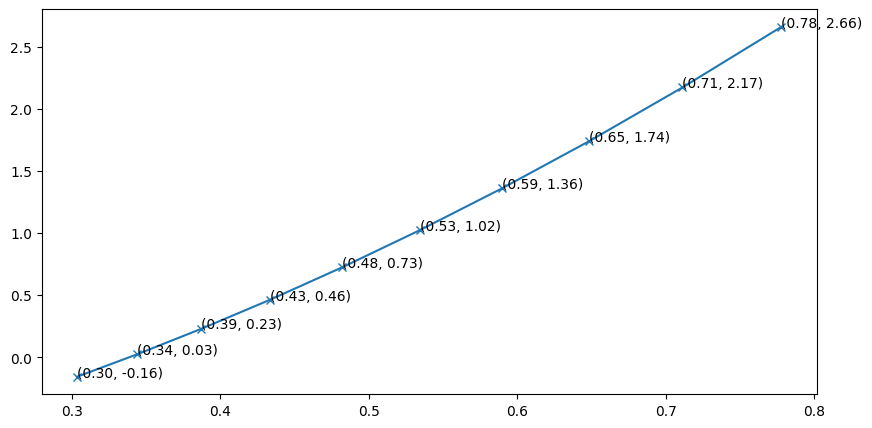

In [ ]:
# Plot the result
fig = plt.figure(figsize=(10, 5))
plt.plot(x_logger, y_logger, marker="x")

for (x, y) in zip(x_logger, y_logger):
    txt = "(%.2f, %.2f)" % (x, y)
    plt.annotate(txt, (x, y))

<h3> Curve fitting </h3>


In [ ]:
# Fit a parabola to some data
# Define a new equation
fx2 = lambda  x: -0.55 * x**2 + 1.2 * x + -0.81

# Create some noisy data
x = torch.linspace(-5, 7, 200)
random_data = fx2(x) + 2 * torch.randn_like(x)

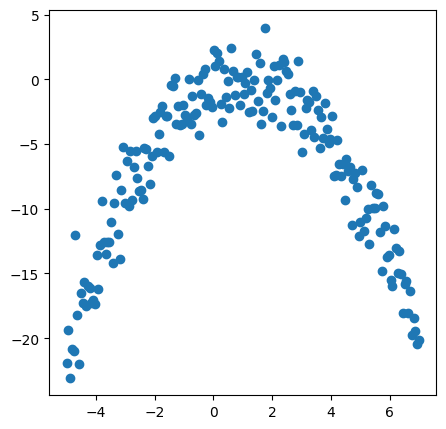

In [ ]:
# Plot the data points
plt.figure(figsize=(5, 5))
plt.scatter(x, random_data)

In [ ]:
# Randomly initialise the parameters of a parabola
a = torch.randn(1)
b = torch.randn(1)
c = torch.randn(1)

In [ ]:
# Set up the tensors for gradient decent
params = torch.cat((a, b, c)).unsqueeze(1)
# Create X matrix
# [x^2 x 1]
x_data = torch.cat(((x**2).unsqueeze(1), x.unsqueeze(1), torch.ones_like(x).unsqueeze(1)), 1)
# Make sure the output Y is the right size
y_data = random_data.unsqueeze(1)

y = -0.58x^2 + 0.38x + -1.48


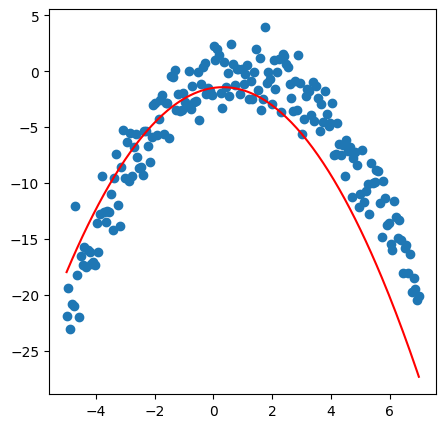

In [ ]:
# Perform the Matrix multiplication using the created tensors
y_pred = torch.mm(x_data, params)

plt.figure(figsize=(5, 5))
plt.plot(x, y_pred, c='r')
plt.scatter(x, random_data)
print("y = %.2fx^2 + %.2fx + %.2f" % (params[0], params[1], params[2]))

<h4>Perform the gradient decent loop</h4>
For curve fitting, the goal is to minimize the difference between the prediction and the real one. One way to do that is to minimise the "mean squared error" between the real and "predicted" outputs. This objective is also known as the "Loss Function". <br><br>

In [ ]:
# Log the error to plot
error_log = []
counter = 0
# Set the gradient scale
learning_rate = 1e-3

# Initialise the error to a large value
error = 1000

# Limit the max number of steps
max_num_steps = 1000

# Re-create the parameter matrix here
params = torch.cat((a, b, c)).unsqueeze(1)
params.requires_grad = True

counter = 0

# Loop until the error is below some threshold
while error > 0.1:
    # Perform a "forward pass"
    y_pred = torch.mm(x_data, params).squeeze()

    # Define the error/loss
    error = (y_pred - random_data).pow(2).mean()

    error.backward()
    error_log.append(error.item())

    with torch.no_grad():
        params -= learning_rate * params.grad
        params.grad.zero_()

    counter += 1

    if counter == max_num_steps:
        break

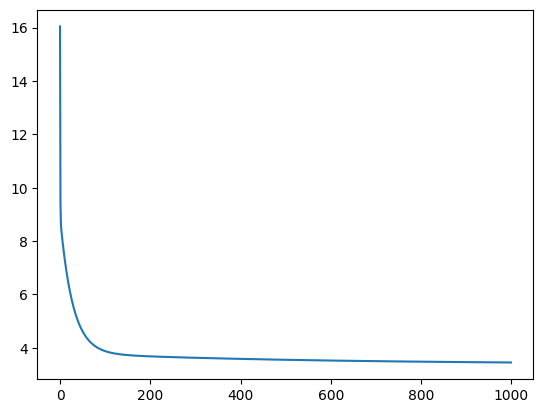

In [ ]:
# Plot the change of error
plt.plot(error_log)

Predicted Equation:
y = -0.55x^2 + 1.18x + -0.94
Real Equation:
y = -0.55x^2 + 1.20x + -0.81


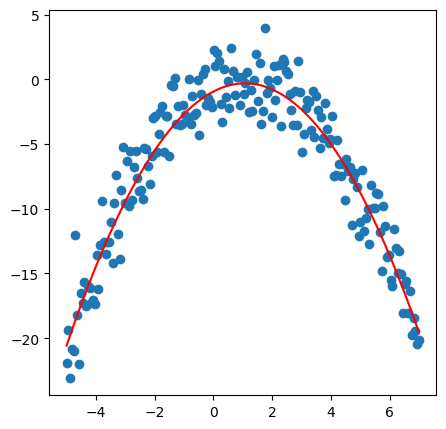

In [ ]:
with torch.no_grad():
    y_pred = torch.mm(x_data, params)
    plt.figure(figsize=(5, 5))
    plt.plot(x, y_pred, c='r')
    plt.scatter(x, random_data)
    print("Predicted Equation:")
    print("y = %.2fx^2 + %.2fx + %.2f" % (params[0], params[1], params[2]))
    print("Real Equation:")
    print("y = %.2fx^2 + %.2fx + %.2f" % (-0.55, 1.2, -0.81))